In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### CSV file

In [13]:
df = pd.read_csv("benchmark_results.csv")

#### Preview

In [14]:
display(df.head())

,fib_index,duration_sec,avg_ram_mb
0,30,0.070429,9.065355
1,30,0.088506,9.313997
2,30,0.109098,8.328748
3,30,0.081004,8.407715
4,30,0.077097,8.322302


#### Aggregate (mean) by fib_index

In [15]:
agg = df.groupby("fib_index").agg({
    "duration_sec": ["mean", "std"],
    "avg_ram_mb": ["mean", "std"]
}).reset_index()
agg.columns = ["fib_index", "duration_mean", "duration_std", "ram_mean", "ram_std"]


#### Plot mean execution time vs. fib_index

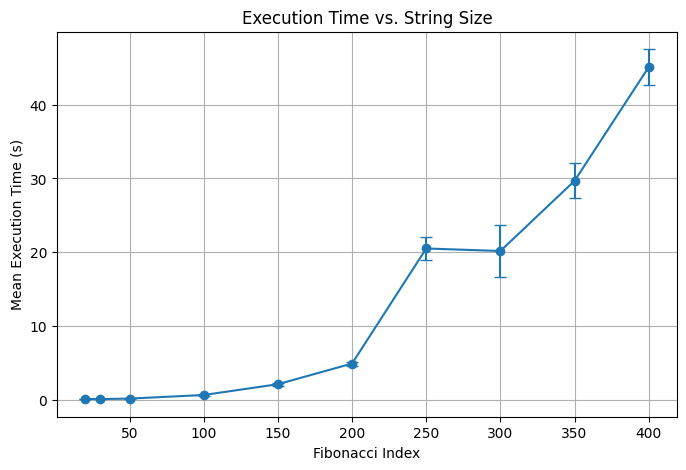

In [16]:
plt.figure(figsize=(8,5))
plt.errorbar(agg["fib_index"], agg["duration_mean"], yerr=agg["duration_std"], fmt='-o', capsize=4)
plt.xlabel("Fibonacci Index")
plt.ylabel("Mean Execution Time (s)")
plt.title("Execution Time vs. String Size")
plt.grid(True)
plt.show()

#### Plot mean RAM usage vs. fib_index

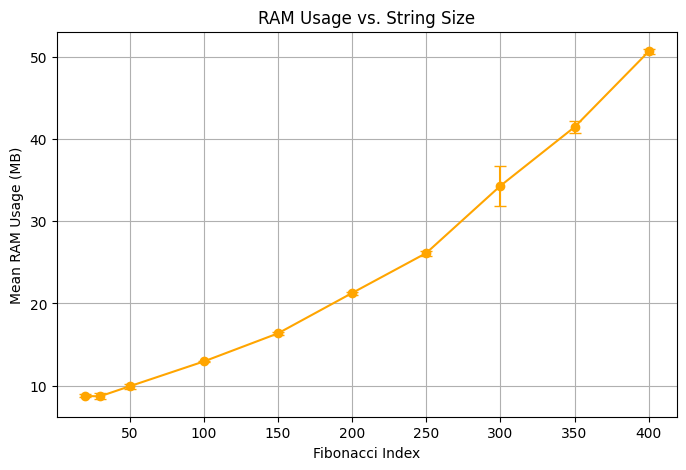

In [17]:
plt.figure(figsize=(8,5))
plt.errorbar(agg["fib_index"], agg["ram_mean"], yerr=agg["ram_std"], fmt='-o', capsize=4, color='orange')
plt.xlabel("Fibonacci Index")
plt.ylabel("Mean RAM Usage (MB)")
plt.title("RAM Usage vs. String Size")
plt.grid(True)
plt.show()

#### Boxplot for all runs (optional, for spread)

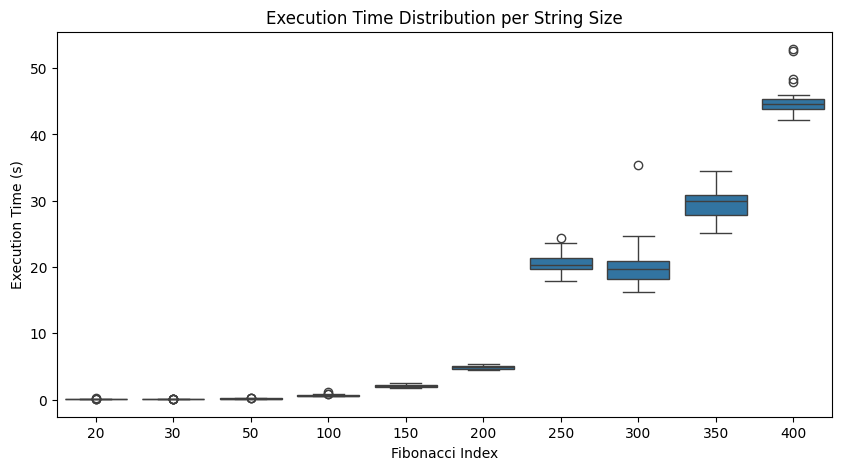

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x="fib_index", y="duration_sec", data=df)
plt.xlabel("Fibonacci Index")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time Distribution per String Size")
plt.show()

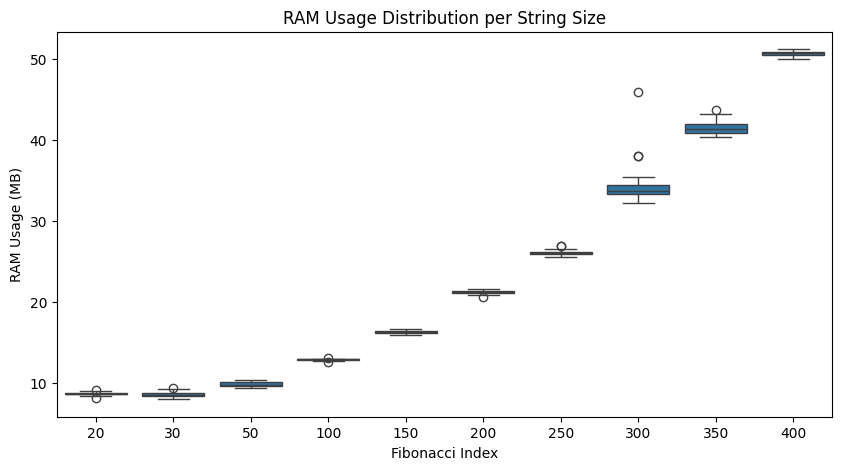

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x="fib_index", y="avg_ram_mb", data=df)
plt.xlabel("Fibonacci Index")
plt.ylabel("RAM Usage (MB)")
plt.title("RAM Usage Distribution per String Size")
plt.show()